

Problem Statement: Bank Churn Prediction
-------------------------------------------------------------------------------------------------------------------------

Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Points Distribution:

The points distribution for this case is as follows:

Read the dataset

Drop the columns which are unique for all users like IDs (5points)

Distinguish the features and target variable(5points)

Divide the data set into training and test sets (5points)

Normalize the train and test data (10points)

Initialize & build the model.
Identify the points of improvement and implement the same. 
Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)

Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

Print the Accuracy score and confusion matrix (5points)

Happy Learning!!

In [6119]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [6120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [6121]:
data = pd.read_csv("bank.csv")

In [6122]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6123]:
data.shape

(10000, 14)

### Drop the columns which are unique for all users like IDs (5points)

In [6124]:
data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6125]:
data.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6126]:
data.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Distinguish the features and target variable(5points)
Here 'exited' is the target variable and rest are independent variables.

In [6127]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6128]:
encoder = LabelEncoder()
data["Geography"] = encoder.fit_transform(data["Geography"])
data["Gender"] = encoder.fit_transform(data["Gender"])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [6129]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


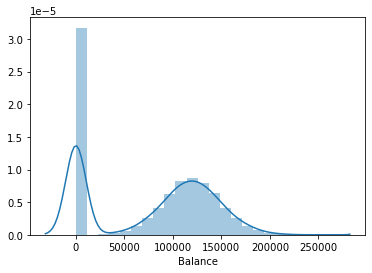

In [6130]:
sns.distplot(data['Balance'])

In [6131]:
data[data['Balance']==0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
dtype: int64

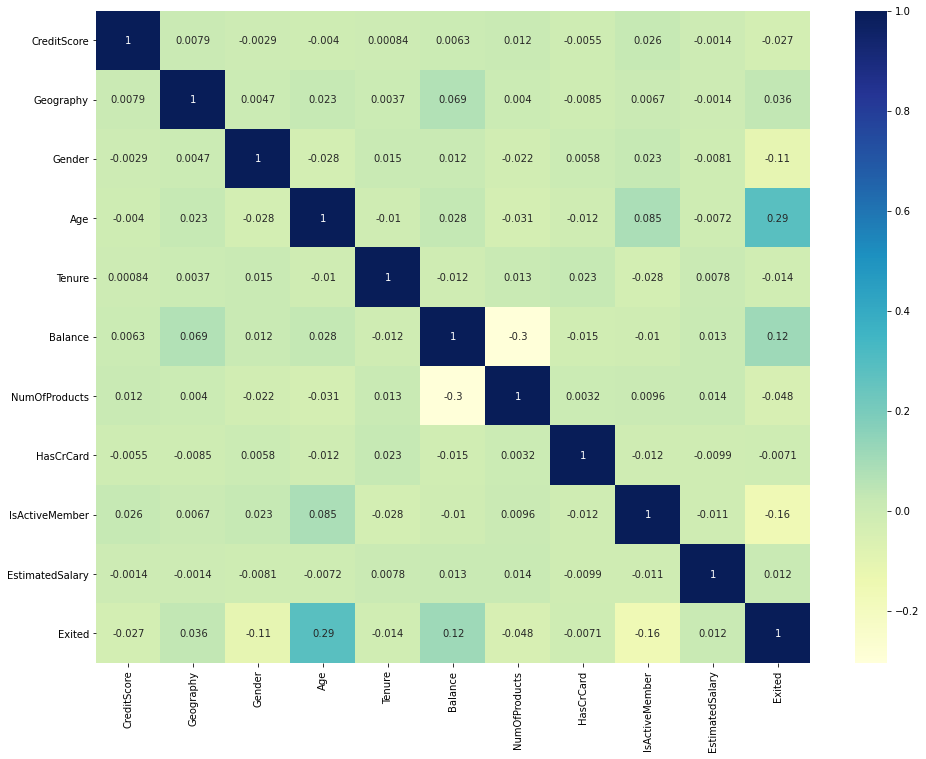

In [6132]:

fig,axis = plt.subplots(figsize=(16,12))
axis = sns.heatmap(data=data.corr(method='pearson',min_periods=1),annot=True,cmap="YlGnBu")

### Divide the data set into training and test sets (5points)

In [6133]:
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 50)

### Normalize the train and test data (10points)

In [6134]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train
X_test

(8000, 10)
(2000, 10)
(8000,)
(2000,)


array([[-2.1048926 ,  0.303816  , -1.11058055, ..., -1.53896753,
         0.968496  , -1.21905131],
       [-0.39422826,  0.303816  , -1.11058055, ...,  0.64978629,
         0.968496  , -1.27082363],
       [ 1.07941631,  0.303816  , -1.11058055, ...,  0.64978629,
         0.968496  , -0.21603317],
       ...,
       [ 0.48171432,  0.303816  , -1.11058055, ...,  0.64978629,
         0.968496  , -1.63442673],
       [ 0.63629242, -0.90300029,  0.90042996, ...,  0.64978629,
         0.968496  , -1.27359857],
       [-0.39422826,  0.303816  , -1.11058055, ...,  0.64978629,
        -1.03252879,  1.0489255 ]])

### Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)

### Model 1

In [6135]:
model1 = Sequential()
model1.add(Dense(20, input_shape = (10,), activation = 'relu', kernel_initializer='uniform'))
model1.add(Dense(10, activation = 'tanh', kernel_initializer='uniform'))
model1.add(Dense(1,  activation = 'sigmoid',kernel_initializer='uniform'))

In [6136]:
sgd = optimizers.Adam(lr = 0.001)

In [6137]:
model1.compile(optimizer = sgd, loss = 'mean_squared_error', metrics=['accuracy', 'mse'])

In [6138]:
model1.summary()

Model: "sequential_258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_818 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_819 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_820 (Dense)            (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [6139]:
history = model1.fit(X_train, y_train.values, batch_size = 100, validation_split = 0.2,  epochs = 50, verbose = 1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 0s 61us/sample - loss: 0.2349 - accuracy: 0.7920 - mse: 0.2349 - val_loss: 0.2045 - val_accuracy: 0.7894 - val_mse: 0.2045
Epoch 2/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1667 - accuracy: 0.7972 - mse: 0.1667 - val_loss: 0.1505 - val_accuracy: 0.7894 - val_mse: 0.1505
Epoch 3/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1440 - accuracy: 0.7972 - mse: 0.1440 - val_loss: 0.1451 - val_accuracy: 0.7894 - val_mse: 0.1451
Epoch 4/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1402 - accuracy: 0.7972 - mse: 0.1402 - val_loss: 0.1425 - val_accuracy: 0.7894 - val_mse: 0.1425
Epoch 5/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1376 - accuracy: 0.7972 - mse: 0.1376 - val_loss: 0.1404 - val_accuracy: 0.7894 - val_mse: 0.1404
Epoch 6/50
6400/6400 [==============================] - 0

6400/6400 [==============================] - 0s 13us/sample - loss: 0.1202 - accuracy: 0.8405 - mse: 0.1202 - val_loss: 0.1258 - val_accuracy: 0.8350 - val_mse: 0.1258
Epoch 47/50
6400/6400 [==============================] - 0s 12us/sample - loss: 0.1202 - accuracy: 0.8397 - mse: 0.1202 - val_loss: 0.1258 - val_accuracy: 0.8344 - val_mse: 0.1258
Epoch 48/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1201 - accuracy: 0.8381 - mse: 0.1201 - val_loss: 0.1261 - val_accuracy: 0.8338 - val_mse: 0.1261
Epoch 49/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1201 - accuracy: 0.8409 - mse: 0.1201 - val_loss: 0.1260 - val_accuracy: 0.8325 - val_mse: 0.1260
Epoch 50/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.1200 - accuracy: 0.8403 - mse: 0.1200 - val_loss: 0.1259 - val_accuracy: 0.8325 - val_mse: 0.1259


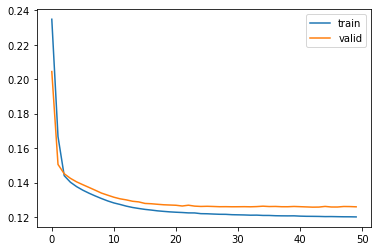

In [6140]:


hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

In [6141]:
results = model1.evaluate(X_test, y_test.values, verbose =0)
accuracy = str(model1.evaluate(X_test,y_test.values, verbose=0)[1])
print('Accuracy: '+ accuracy)

Accuracy: 0.834


In [6142]:
print(model1.metrics_names)
print(results) 

['loss', 'accuracy', 'mse']
[0.12618024319410323, 0.834, 0.12618025]


### Model2 

In [6143]:
model2 = Sequential()
model2.add(Dense(10, input_shape = (10,), activation = 'relu', kernel_initializer='normal'))
model2.add(Dense(10, activation = 'relu', kernel_initializer='normal'))
model2.add(Dense(10, activation = 'relu', kernel_initializer='normal'))
model2.add(Dense(1,  activation = 'sigmoid',kernel_initializer='normal'))

In [6144]:
sgd = optimizers.Adam(lr = 0.001)

In [6145]:
model2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy', 'mse'])

In [6146]:
model2.summary()

Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_821 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_822 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_823 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_824 (Dense)            (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [6147]:
history = model2.fit(X_train, y_train.values, batch_size = 100, validation_split = 0.2,  epochs =50, verbose = 1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 0s 72us/sample - loss: 0.6735 - accuracy: 0.7953 - mse: 0.2402 - val_loss: 0.6369 - val_accuracy: 0.7894 - val_mse: 0.2220
Epoch 2/50
6400/6400 [==============================] - 0s 14us/sample - loss: 0.5420 - accuracy: 0.7972 - mse: 0.1789 - val_loss: 0.4656 - val_accuracy: 0.7894 - val_mse: 0.1499
Epoch 3/50
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4480 - accuracy: 0.7972 - mse: 0.1439 - val_loss: 0.4483 - val_accuracy: 0.7894 - val_mse: 0.1447
Epoch 4/50
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4357 - accuracy: 0.7972 - mse: 0.1397 - val_loss: 0.4416 - val_accuracy: 0.7894 - val_mse: 0.1420
Epoch 5/50
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4298 - accuracy: 0.7972 - mse: 0.1373 - val_loss: 0.4372 - val_accuracy: 0.7894 - val_mse: 0.1399
Epoch 6/50
6400/6400 [==============================] - 0

6400/6400 [==============================] - 0s 15us/sample - loss: 0.3422 - accuracy: 0.8614 - mse: 0.1047 - val_loss: 0.3660 - val_accuracy: 0.8481 - val_mse: 0.1131
Epoch 47/50
6400/6400 [==============================] - 0s 15us/sample - loss: 0.3406 - accuracy: 0.8602 - mse: 0.1043 - val_loss: 0.3670 - val_accuracy: 0.8438 - val_mse: 0.1139
Epoch 48/50
6400/6400 [==============================] - 0s 14us/sample - loss: 0.3390 - accuracy: 0.8602 - mse: 0.1036 - val_loss: 0.3657 - val_accuracy: 0.8494 - val_mse: 0.1134
Epoch 49/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.3378 - accuracy: 0.8639 - mse: 0.1032 - val_loss: 0.3651 - val_accuracy: 0.8506 - val_mse: 0.1128
Epoch 50/50
6400/6400 [==============================] - 0s 13us/sample - loss: 0.3373 - accuracy: 0.8622 - mse: 0.1030 - val_loss: 0.3631 - val_accuracy: 0.8481 - val_mse: 0.1116


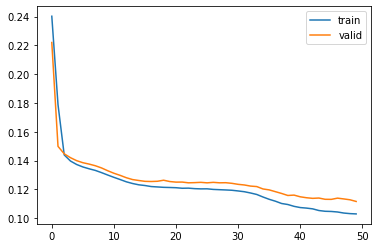

In [6148]:


hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

In [6149]:
results = model2.evaluate(X_test, y_test.values, verbose =0)
accuracy = str(model1.evaluate(X_test,y_test.values, verbose=0)[1])
print('Accuracy: '+ accuracy)

Accuracy: 0.834


In [6150]:
print(model2.metrics_names)
print(results) 

['loss', 'accuracy', 'mse']
[0.3624837958812714, 0.8575, 0.11011941]


### Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

In [6151]:
def predict_with_threshold(model, x, batch_size, verbose):
    proba = model.predict(x, batch_size=batch_size, verbose=verbose)
    return (proba >= 0.50).astype('int32')
    


In [6152]:
Y_pred1 = predict_with_threshold(model1 , X_test, batch_size=1000, verbose=0)
Y_pred2 = predict_with_threshold(model2 , X_test, batch_size=1000, verbose=0)

### Print the Accuracy score and confusion matrix (5points)

### Model_1

In [6153]:
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred1)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred1)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred1)))
confusionMatrix = confusion_matrix(y_test.values,Y_pred1)


Recall_score: 0.35074626865671643
Precision_score: 0.6650943396226415
F-score: 0.4592833876221499


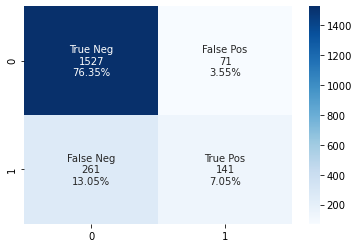

In [6154]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='', cmap='Blues')

### Model_2

In [6155]:
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred2)))
confusionMatrix = confusion_matrix(y_test.values,Y_pred2)

Recall_score: 0.4701492537313433
Precision_score: 0.7241379310344828
F-score: 0.5701357466063348


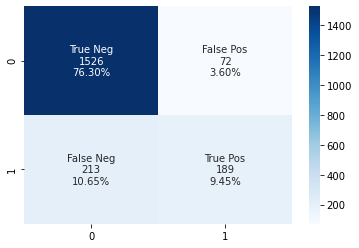

In [6156]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='', cmap='Blues')

#### Model 2 is giving a better F1 score than Model 1. In Model 2 we had introduced different set of hidden relu layers. Model 1 uses one relu and a tanh activation function hidden layers. Learning rates are same. 